# Dopaminergic modulation of dSPN

Following optimisation, you can analyse your results to visualise the comparison between the experimental data and the optimisation results. We have developed a class called optimisationResult, which loads all the files from the optimisation. You can develop your own analysis based on your requirements by creating a child class, see example dspn_analysis.py. The child class dSPNanalysis contains custom code as well as the loading of all files, enabling the user to define any analysis. The simulations are saved as voltage traces and can therefore be analysed like any electrophysiological recording.

In [3]:
from dspn_analysis import dSPNanalysis
from neuromodcell.experimental_data import Experimental

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/neuromodcell/analysis.py:37: UserWarning: loadtxt: Empty input file: "dspn/dopamine/ID_3/voltage_modulation_pass.csv"
  self.voltage_modulation_pass = np.loadtxt(self.dir_path /  'voltage_modulation_pass.csv')
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/neuromodcell/plotting.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, modulated_sim[i], 'ok', markersize=3,c='black')
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/neuromodcell/plotting.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "og" (-> color='g'). The keyword argument will take precedence.
  ax.plot(i, control_sim[i], 'og', markersize=3,c='g')
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/neuromodcell/plotting.py:73: MatplotlibDeprecation

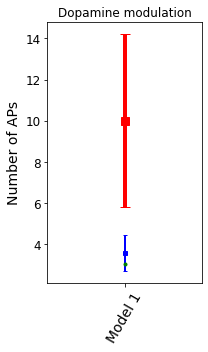

In [4]:
dl = dSPNanalysis('dspn/dopamine/ID_3/')
dl.load()
dl.dopamine_analysis()


dSPNmodulation = Experimental() 
dSPNmodulation.define_exp(control = { "mean" : 3.566, "std" : 0.88})
dSPNmodulation.define_exp(modulated = { "mean" :3.566 + dl.get_criteria()['mean'], \
                                       "std" : dl.get_criteria()['std'] * 1.5})

dSPNmodulation.define_exp(control_sim = dl.get_dopamine_control())
dSPNmodulation.define_exp(modulated_sim = [dl.num_AP_passing_analysis_traces_dopamine])
dl.plot_comparison(dSPNmodulation.experimental_data['control'],dSPNmodulation.experimental_data['control_sim'],\
                   dSPNmodulation.experimental_data['modulated'], dSPNmodulation.experimental_data['modulated_sim'],\
                   x_ticks=['Model 1'],ylabel='Number of APs',title='Dopamine modulation',num_models=1,save=True,\
                   filename='model_1.pdf',width=3,height=5)

In [5]:
dl.save_selected_modulation()
modulation, voltage = dl.get_final_modulation()

dl.plot_chosen_modulation()

ValueError: min() arg is an empty sequence